In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy import stats
from scipy.stats import gaussian_kde

In [3]:
single_mut = {'YAP1':[],'TEM1':[],'RRM':[]}
epi = {'YAP1':[(35,0.2612),(150,0.3163),(650,0.3444),(3000,0.3048), ('ESM1v',650,0.3484)],
       'TEM1':[(35,0.2149),(150,0.296),(650,0.3748),(3000,0.1442),('ESM1v',650,0.3828)],
       'RRM':[(35,0.2543),(150,0.2481),(650,0.2633),(3000,0.2503), ('ESM1v',650, 0.1998)]}

In [4]:
# Compute averaged parameters for two groups
avg_params = {
    "1st": (1, 0.5565, 8.1951),
    "2nd": (1, 0.4562, 9.3169)
}
# Define logistic function
def transf(x, a, b, c):
    return -a * np.log(1 + np.exp(-b * (x + c)))

In [5]:
df = pd.read_csv('Working_Data/35/esm2_35_unique_single_mutations_YAP1.csv')
#df = df.dropna(subset=['Epistasis'])
# remove all nans
#df = df[~df.apply(lambda row: row.astype(str).str.contains('log\(1e-6\)').any(), axis=1)]
#df = df[~df.apply(lambda row: row.astype(str).str.contains('1e-06').any(), axis=1)]
df

,mutant_concat,llm_single_mut,expt_single_mut
0,D10E,-3.190041,0.371315
1,L30M,-4.521028,-0.300061
2,G16A,-7.120153,-1.187056
3,V11H,-4.108610,0.788732
4,R27P,-2.708509,0.316449
...,...,...,...
341,S24V,-6.981499,-0.060106
342,T36H,-6.789945,-1.076516
343,G25L,-9.654889,-1.203792
344,T36D,-7.235872,-2.138792


In [6]:
s = df['expt_single_mut']
sllm = df['llm_single_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['YAP1'].append((35,corr)) 

Pearson correlation: 0.49352426381809683
P-value: 1.2156855495346472e-22


In [7]:
# Compute averaged parameters for two groups
avg_params = {
    "1st": (1, 0.5166, 7.3834),
    "2nd": (1, 0.3782, 9.1546)
}

df = pd.read_csv('Working_Data/150/esm2_150_unique_single_mutations_YAP1.csv')
s = df['expt_single_mut']
sllm = df['llm_single_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['YAP1'].append((150,corr)) 

Pearson correlation: 0.6090151331146659
P-value: 1.6844833335574727e-36


In [8]:
avg_params = {
    "1st": (1, 0.5492, 7.2232),
    "2nd": (1, 0.4354, 8.7439)
}

df = pd.read_csv('Working_Data/650/esm2_650_unique_single_mutations_YAP1.csv')
s = df['expt_single_mut']
sllm = df['llm_single_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['YAP1'].append((650,corr)) 

Pearson correlation: 0.6594191899774722
P-value: 1.5377569784272115e-44


In [9]:
avg_params = {
    "1st": (1, 0.426, 7.6023),
    "2nd": (1, 0.3692, 9.4259)
}

df = pd.read_csv('Working_Data/3000/esm2_3b_unique_single_mutations_YAP1.csv')
s = df['expt_single_mut']
sllm = df['llm_single_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['YAP1'].append((3000,corr)) 

Pearson correlation: 0.5903679325964316
P-value: 7.0673222544416785e-34


In [10]:
avg_params = {
    "1st": (1, 0.5565, 8.1951),
    "2nd": (1, 0.4562, 9.3169)
}

df = pd.read_csv('Working_Data/1_650/esm1_unique_single_mutations_YAP1.csv')
s = df['expt_single_mut']
sllm = df['llm_single_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['YAP1'].append(('ESM1v',650,corr)) 

Pearson correlation: 0.6144860425246871
P-value: 2.6520707870634746e-37


In [11]:
avg_params = {
    "1st": (1, 0.6933, 4.1261),
    "2nd": (1, 0.4968, 2.3406)
}


df = pd.read_csv('Working_Data/35/esm2_35_unique_single_mutations_TEM1.csv')
#df = df.dropna(subset=['Epistasis'])
# remove all nans
#df = df[~df.apply(lambda row: row.astype(str).str.contains('log\(1e-6\)').any(), axis=1)]
#df = df[~df.apply(lambda row: row.astype(str).str.contains('1e-06').any(), axis=1)]
s = df['expt_single_mut']
sllm = df['llm_single_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['TEM1'].append((35,corr)) 

Pearson correlation: 0.545055141238051
P-value: 0.0


In [12]:
avg_params = {
    "1st": (1, 0.6514, 5.4992),
    "2nd": (1, 0.4572, 3.4637)
}


df = pd.read_csv('Working_Data/150/esm2_150_unique_single_mutations_TEM1.csv')
#df = df.dropna(subset=['Epistasis'])
# remove all nans
#df = df[~df.apply(lambda row: row.astype(str).str.contains('log\(1e-6\)').any(), axis=1)]
#df = df[~df.apply(lambda row: row.astype(str).str.contains('1e-06').any(), axis=1)]
s = df['expt_single_mut']
sllm = df['llm_single_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['TEM1'].append((150,corr)) 

Pearson correlation: 0.6041277417018823
P-value: 0.0


In [13]:
avg_params = {
    "1st": (1,0.6639, 7.2371),
    "2nd": (1, 0.4298, 4.6874)
}


df = pd.read_csv('Working_Data/650/esm2_650_unique_single_mutations_TEM1.csv')
#df = df.dropna(subset=['Epistasis'])
# remove all nans
#df = df[~df.apply(lambda row: row.astype(str).str.contains('log\(1e-6\)').any(), axis=1)]
#df = df[~df.apply(lambda row: row.astype(str).str.contains('1e-06').any(), axis=1)]
s = df['expt_single_mut']
sllm = df['llm_single_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['TEM1'].append((650,corr)) 

Pearson correlation: 0.6912040651105138
P-value: 0.0


In [14]:
avg_params = {
    "1st": (1,0.4213, 8.8965),
    "2nd": (1, 0.2995, 5.9639)
}


df = pd.read_csv('Working_Data/3000/esm2_3b_unique_single_mutations_TEM1.csv')
#df = df.dropna(subset=['Epistasis'])
# remove all nans
#df = df[~df.apply(lambda row: row.astype(str).str.contains('log\(1e-6\)').any(), axis=1)]
#df = df[~df.apply(lambda row: row.astype(str).str.contains('1e-06').any(), axis=1)]
s = df['expt_single_mut']
sllm = df['llm_single_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['TEM1'].append((3000,corr)) 

Pearson correlation: 0.4808214116995809
P-value: 2.518598455818565e-260


In [15]:
avg_params = {
    "1st": (1, 0.5305, 7.4275),
    "2nd": (1, 0.3379, 4.2474)
}


df = pd.read_csv('Working_Data/1_650/esm1_unique_single_mutations_TEM1.csv')
#df = df.dropna(subset=['Epistasis'])
# remove all nans
#df = df[~df.apply(lambda row: row.astype(str).str.contains('log\(1e-6\)').any(), axis=1)]
#df = df[~df.apply(lambda row: row.astype(str).str.contains('1e-06').any(), axis=1)]
s = df['expt_single_mut']
sllm = df['llm_single_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['TEM1'].append(('ESM1v',650,corr)) 

Pearson correlation: 0.6844902704760784
P-value: 0.0


In [16]:
avg_params = {
    "1st": (1,0.3872, 11.0279),
    "2nd": (1, 0.3209, 10.1318)
}


df = pd.read_csv('Working_Data/35/esm2_35_unique_single_mutations_RRM_Domain.csv')
#df = df.dropna(subset=['Epistasis'])
# remove all nans
#df = df[~df.apply(lambda row: row.astype(str).str.contains('log\(1e-6\)').any(), axis=1)]
#df = df[~df.apply(lambda row: row.astype(str).str.contains('1e-06').any(), axis=1)]
s = df['exp_mut']
sllm = df['llm_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['RRM'].append((35,corr)) 

Pearson correlation: 0.5569941986221587
P-value: 9.768203873830575e-88


In [17]:
avg_params = {
    "1st": (1,0.4051, 11.0666),
    "2nd": (1, 0.3454, 10.2324)
}


df = pd.read_csv('Working_Data/150/RRM2_sample_80_150M_esm2_unique_muts.csv')
#df = df.dropna(subset=['Epistasis'])
# remove all nans
#df = df[~df.apply(lambda row: row.astype(str).str.contains('log\(1e-6\)').any(), axis=1)]
#df = df[~df.apply(lambda row: row.astype(str).str.contains('1e-06').any(), axis=1)]
s = df['exp_mut']
sllm = df['llm_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['RRM'].append((150,corr)) 

Pearson correlation: 0.6269092103269419
P-value: 1.1619608859725894e-114


In [18]:
avg_params = {
    "1st": (1,0.327, 13.0243),
    "2nd": (1, 0.2998, 11.7616)
}


df = pd.read_csv('Working_Data/650/20_esm2_650_unique_single_mutations_RRM_Domain.csv')
#df = df.dropna(subset=['Epistasis'])
# remove all nans
#df = df[~df.apply(lambda row: row.astype(str).str.contains('log\(1e-6\)').any(), axis=1)]
#df = df[~df.apply(lambda row: row.astype(str).str.contains('1e-06').any(), axis=1)]
s = df['exp_mut']
sllm = df['llm_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['RRM'].append((650,corr)) 

Pearson correlation: 0.5747229980857331
P-value: 1.3149681655907033e-73


In [19]:
avg_params = {
    "1st": (1, 0.3299, 12.9564),
    "2nd": (1, 0.2892, 11.6744)
}


df = pd.read_csv('Working_Data/3000/20_esm2_3b_unique_single_mutations_RRM_Domain.csv')
#df = df.dropna(subset=['Epistasis'])
# remove all nans
#df = df[~df.apply(lambda row: row.astype(str).str.contains('log\(1e-6\)').any(), axis=1)]
#df = df[~df.apply(lambda row: row.astype(str).str.contains('1e-06').any(), axis=1)]
s = df['exp_mut']
sllm = df['llm_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['RRM'].append((3000,corr)) 

Pearson correlation: 0.6168268765232708
P-value: 5.3725643713120116e-89


In [20]:
avg_params = {
    "1st": (1, 0.2817, 14.0424),
    "2nd": (1, 0.2713, 12.5865)
}


df = pd.read_csv('Working_Data/1_650/esm1_unique_single_mutations_RRM_Domain.csv')
#df = df.dropna(subset=['Epistasis'])
# remove all nans
#df = df[~df.apply(lambda row: row.astype(str).str.contains('log\(1e-6\)').any(), axis=1)]
#df = df[~df.apply(lambda row: row.astype(str).str.contains('1e-06').any(), axis=1)]
s = df['exp_mut']
sllm = df['llm_mut']

# Apply nonlinear function with '1st' parameters to mut1 and mut2
sllmt = transf(sllm, *avg_params["1st"])

# Filter out NaNs
mask = ~np.isnan(s) & ~np.isnan(sllmt)
x_filtered = sllmt[mask]
y_filtered = s[mask]
# Compute Pearson correlation
corr, pval = stats.pearsonr(x_filtered, y_filtered)
print("Pearson correlation:", corr)
print("P-value:", pval)
#curr =single_mut['YAP1']
#curr.append((35,corr))
single_mut['RRM'].append(('ESM1v',650,corr)) 

Pearson correlation: 0.5298485245321166
P-value: 4.679239593707345e-78


In [21]:
single_mut

{'YAP1': [(35, 0.49352426381809683),
  (150, 0.6090151331146659),
  (650, 0.6594191899774722),
  (3000, 0.5903679325964316),
  ('ESM1v', 650, 0.6144860425246871)],
 'TEM1': [(35, 0.545055141238051),
  (150, 0.6041277417018823),
  (650, 0.6912040651105138),
  (3000, 0.4808214116995809),
  ('ESM1v', 650, 0.6844902704760784)],
 'RRM': [(35, 0.5569941986221587),
  (150, 0.6269092103269419),
  (650, 0.5747229980857331),
  (3000, 0.6168268765232708),
  ('ESM1v', 650, 0.5298485245321166)]}

In [22]:
esm1v_score

NameError: name 'esm1v_score' is not defined

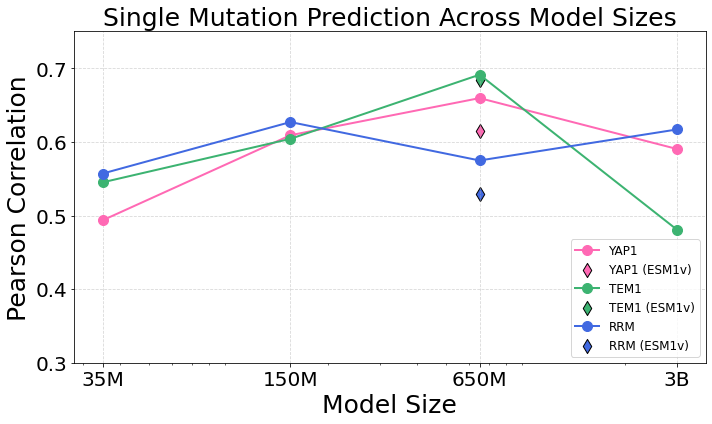

In [35]:
# Define colors
colors = {
    'YAP1': 'hotpink',
    'TEM1': 'mediumseagreen',
    'RRM': 'royalblue'
}

fig, ax = plt.subplots(figsize=(10, 6))

# Store legend handles to deduplicate later
legend_handles = []
legend_labels = []

for protein in single_mut:
    esm2_sizes = []
    esm2_scores = []
    esm1v_size = None
    esm1v_score = None

    for entry in single_mut[protein]:
        if entry[0] == 'ESM1v':
            esm1v_size = entry[1]
            esm1v_score = entry[2]
        else:
            esm2_sizes.append(entry[0])
            esm2_scores.append(entry[1])

    # Plot ESM2 line
    line = ax.plot(esm2_sizes, esm2_scores, label=protein,
                   marker='o', color=colors[protein], linewidth=2,ms=10)
    legend_handles.append(line[0])
    legend_labels.append(protein)

    # Plot ESM1v star
    star = ax.scatter(esm1v_size, esm1v_score, marker='d', s=100,
                      color=colors[protein], edgecolor='black',
                      label=f'{protein} (ESM1v)')
    legend_handles.append(star)
    legend_labels.append(f'{protein} (ESM1v)')

# Formatting
ax.set_xscale('log')
ax.set_xticks([35, 150, 650, 3000], fontsize=20)
ax.set_xticklabels(['35M', '150M', '650M', '3B'], fontsize=20)
ax.set_xlabel("Model Size", fontsize=25)
ax.set_ylabel("Pearson Correlation", fontsize=25)
ax.set_title("Single Mutation Prediction Across Model Sizes", fontsize=25)
ax.tick_params(axis='both', labelsize=20)
ax.grid(True, linestyle='--', alpha=0.5)

# Set y-axis range
ax.set_ylim(0.3, 0.75)

# Remove duplicate labels if any
unique_labels = dict(zip(legend_labels, legend_handles))
ax.legend(unique_labels.values(), unique_labels.keys(), fontsize=12, loc='lower right')

plt.tight_layout()
plt.savefig('sizes_single_v1.png',dpi=300)
plt.show()

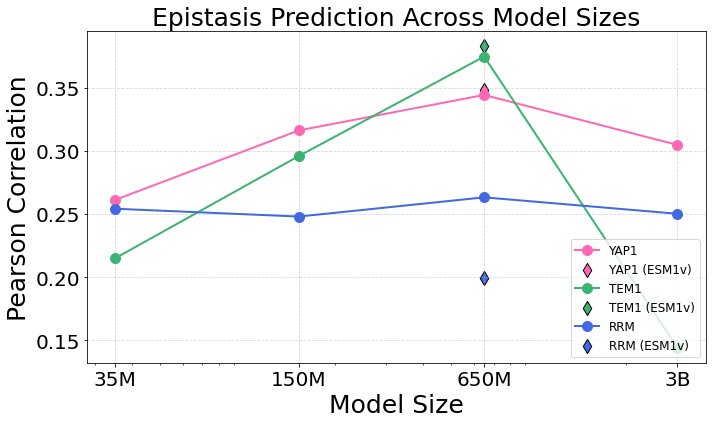

In [34]:
# Define colors
colors = {
    'YAP1': 'hotpink',
    'TEM1': 'mediumseagreen',
    'RRM': 'royalblue'
}

fig, ax = plt.subplots(figsize=(10, 6))

# Store legend handles to deduplicate later
legend_handles = []
legend_labels = []

for protein in epi:
    esm2_sizes = []
    esm2_scores = []
    esm1v_size = None
    esm1v_score = None

    for entry in epi[protein]:
        if entry[0] == 'ESM1v':
            esm1v_size = entry[1]
            esm1v_score = entry[2]
        else:
            esm2_sizes.append(entry[0])
            esm2_scores.append(entry[1])

    # Plot ESM2 line
    line = ax.plot(esm2_sizes, esm2_scores, label=protein,
                   marker='o', color=colors[protein], linewidth=2, ms=10)
    legend_handles.append(line[0])
    legend_labels.append(protein)

    # Plot ESM1v star
    star = ax.scatter(esm1v_size, esm1v_score, marker='d', s=100,
                      color=colors[protein], edgecolor='black',
                      label=f'{protein} (ESM1v)')
    legend_handles.append(star)
    legend_labels.append(f'{protein} (ESM1v)')

# Formatting
ax.set_xscale('log')
ax.set_xticks([35, 150, 650, 3000], fontsize=20)
ax.set_xticklabels(['35M', '150M', '650M', '3B'], fontsize=20)
ax.set_xlabel("Model Size", fontsize=25)
ax.set_ylabel("Pearson Correlation", fontsize=25)
ax.set_title("Epistasis Prediction Across Model Sizes", fontsize=25)
ax.tick_params(axis='both', labelsize=20)
ax.grid(True, linestyle='--', alpha=0.5)

# Set y-axis range
#ax.set_ylim(0.3, 0.75)

# Remove duplicate labels if any
unique_labels = dict(zip(legend_labels, legend_handles))
ax.legend(unique_labels.values(), unique_labels.keys(), fontsize=12, loc='lower right')

plt.tight_layout()
plt.savefig('sizes_epi_v1.png',dpi=300)
plt.show()